In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.target.shape)

(506,)


In [5]:
import pandas as pd
bos = pd.DataFrame(boston.data)

print(type(bos))

<class 'pandas.core.frame.DataFrame'>


In [6]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [7]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#converting x and y to matrix
X=X.as_matrix()
print(type(X))

Y=Y.as_matrix()
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=4)

# applying column standardization on train and test data

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.416493,-0.465600,-0.612483,-0.222566,-0.928871,-0.101212,-2.266637,0.906669,-0.768893,-1.060561,-0.283675,0.292087,-0.980531,25.3
1,-0.425346,-0.465600,-0.981708,-0.222566,-0.979762,-0.522899,-0.603873,1.986682,-0.768893,-0.360605,0.136671,0.086819,-0.015801,17.2
2,0.484042,-0.465600,1.027050,4.493050,0.937147,-0.558688,0.753263,-1.256136,1.593538,1.486337,0.790542,-0.096237,-0.548794,50.0
3,-0.428239,0.629132,-0.912844,-0.222566,-1.115473,-0.104324,-0.807625,0.755834,-0.656397,-0.778226,0.230081,0.371634,-0.741458,22.9
4,0.212953,-0.465600,1.027050,-0.222566,1.318833,0.434067,0.764179,-0.468513,1.593538,1.486337,0.790542,0.406429,-0.350504,20.2


# Manual SGD implementation for Linear regression

In [18]:
#SGD implementation for linear regression
#function having parameter X_train,y_train,no of iteration,learning rate r
#intialising no of iteration=100,learning rate =0.01
#batch size=32
#X-dim-->(n,d) #Y-dim-->(n,1)

W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,100,0.01,32 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,13)),0
    data=df_train.sample(32) #sampling random k=batch size=20 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
print(W)
print(B)

[[-1.0352654   1.09785221 -0.38786525  0.98870655 -1.55943385  2.08464158
  -0.13500078 -3.021781    2.21838717 -1.46650904 -1.50931157  0.57928663
  -3.60930766]]
[22.02635078]


In [19]:

#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

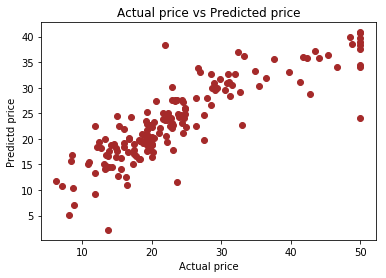

In [20]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr,color='brown')
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [21]:
MSE_manual_LR=mean_squared_error(y_test,y_predic_lr)
print('mean squared error =',MSE_manual_LR)

mean squared error = 30.785686758511293


# SGD regression sklearn implementation

C:\Users\Roshan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


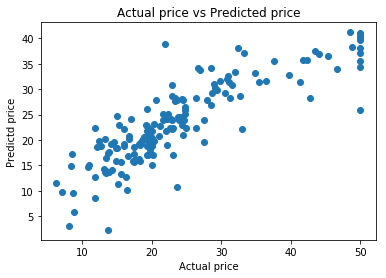

In [25]:
#SGD regression sklearn implementation

#intialising no of iteration=100,eta0=1
#taking t=2 and power_t=1 such that for each iteration eta0=eta0/pow(2,1) ,it means half each times

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,n_iter=750)
model.fit(X_train,y_train)
y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [26]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 31.325833438486164


In [27]:
#comparison between MSE of own implementation and SGD sklearn implementation
print('MSE of manual implementation = ',MSE_manual_LR)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_sgd)

MSE of manual implementation =  30.785686758511293
--------------------------------------------------
MSE of SGD sklearn implementation =  31.325833438486164


# Observations :

1. Mean square error of manual implementation is comparitively less than SGD sklearn implementation.
2. In the manual implementation, we took the learning rate as 0.01 and iteration as 100 along with batch size(k)=20.